# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

"Despite significant indications of progress, racial inequality is still pervasive in the U.S. labor market. Compared to whites, African Americans are twice as likely to be unemployed, and earn nearly 25 percent less when they are employed.

Names were chosen according to frequency data obtained from birth certificates of Massachusetts births from 1974 and 1979. The validity of the names' "blackness" or "whiteness" was confirmed by surveys in public areas in Chicago."[Source](https://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states)

`Testing on names.`
### Data
- In the dataset provided, each row represents a resume. 
- The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. 
- The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes based on candidates's names when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Set options to inspect all of the columns
pd.options.display.max_columns = 65

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
data.head().append(data.tail())

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
4865,b,99,3,2,1,0,0,0,1,313,6,0,0,1,1,Tamika,f,b,0.0,1.0,0.0,b,a,1344.0,0.003336,0.981653,10.299677,0.190751,0.328431,10.003831,0.0,,,0.0,12.9,198.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Private
4866,a,99b,4,4,6,0,0,0,0,285,4,1,0,1,0,Ebony,f,b,0.0,1.0,0.0,b,s,382.0,0.144843,0.716077,9.967776,0.068858,0.263203,9.643809,1.0,,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4867,a,99b,4,6,8,0,1,0,0,21,1,1,1,1,0,Jay,m,w,1.0,0.0,0.0,b,s,382.0,0.054735,0.810473,9.841985,0.015656,0.224219,9.321345,1.0,,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4868,a,99b,4,4,2,0,1,1,0,267,4,1,1,1,0,Latonya,f,b,1.0,0.0,0.0,b,s,382.0,0.342481,0.422792,10.099547,0.194318,0.273801,9.654257,1.0,,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4869,a,99b,4,3,7,0,0,0,1,274,4,0,0,0,0,Laurie,f,w,0.0,1.0,0.0,b,s,382.0,0.018670,0.873805,10.039984,0.274885,0.092559,9.381095,1.0,,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,


In [5]:
# Nearly 5,000 resumes were sent in response to over 1,300 newspaper ads 
data.shape

(4870, 65)

In [6]:
len(data.id.unique())

289

In [7]:
# Picking out features to get started
initial = data.loc[:,list('id education race sex call city' .split())]
initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 6 columns):
id           4870 non-null object
education    4870 non-null int8
race         4870 non-null object
sex          4870 non-null object
call         4870 non-null float32
city         4870 non-null object
dtypes: float32(1), int8(1), object(4)
memory usage: 214.0+ KB


In [21]:
# Percent of Call Backs out of All Resumes 
initial.groupby(['race','sex'])['call'].sum()/(len(initial)/100)

race  sex
b     f      2.566735
      m      0.657084
w     f      3.778234
      m      1.047228
Name: call, dtype: float32

- Looks like females get more call backs overall, and white sounding names gets more call backs in this sample. See the bar chart below.

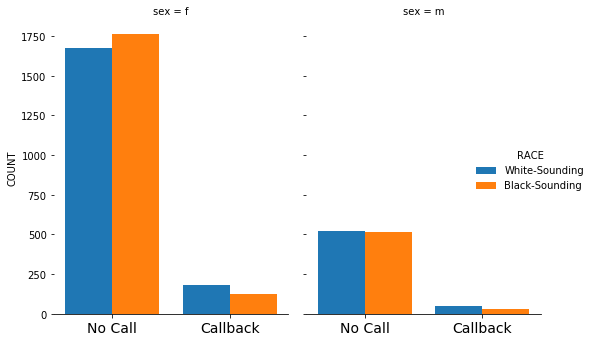

In [235]:
# Call back rates by race and sex of the candidate
g = sns.catplot(x='call', hue='race', col='sex', col_wrap=2, data=initial, kind='count', 
                height=5, saturation=1, aspect=.75)

# Label ticks and axes
(g.set_xticklabels(['No Call', 'Callback'], fontsize=14)
 .set_axis_labels('', 'COUNT')
.despine(left=True))

# Legend Title
new_title = 'RACE'
g._legend.set_title(new_title)

# Replace labels
new_labels = ['White-Sounding', 'Black-Sounding']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.savefig('catplot_racial')
plt.show()

- Female candidates or resumes from Female group have far higher NO CALL BACK rates than males. However, overall Female candites have better CALL BACKs in both WHITE SOUNDING and BLACK SOUNDING names.


- Among Females candidates, looks like Black Sounding Female group have a bit more NO CALL BACKs.


- Visuals suggests that there might be a discrimination case against MALE canditates, but we do not know if there more positions available for FEMALES than MALES. 

In [108]:
# Sample size for black-sounding names
print("The number of black-sounding resumes is", str(sum(initial['race']=='b')))

# Number of callbacks for black-sounding names
print("The number of callbacks for black-sounding names is", str(sum(data[data.race=='b'].call)))

# Sample size for white-sounding names
print("The number of white-sounding resumes is", str(sum(initial['race']=='w')))

# Number of callbacks for white-sounding names
print("The number of callbacks for white-sounding names is", str(sum(data[data.race=='w'].call)))

The number of black-sounding resumes is 2435
The number of callbacks for black-sounding names is 157.0
The number of white-sounding resumes is 2435
The number of callbacks for white-sounding names is 235.0


<div class="span5 alert alert-success">
<p>1. What test is appropriate for this problem? Does CLT apply?</p>
</div>

Since the rate of callbacks to applications for the two groups is compared, a **Two-Proportion Z-Test** is a good fit.

Per the Central Limit Theorem (CLT), regardless of the population, the distribution of sample averages tends to be normal if sample size is  greater than or equal to 30.


<div class="span5 alert alert-success">
<p>2. What are the null and alternate hypotheses?</p>
</div>

Overall white-sounding names received more call bakcs than blac-sounding names, to find out if the difference is significant among groups we would apply Two Sample Z test to compare samples.

We see that there is a significant difference in sample means of these two groups, however we do not know if this reflects the population characteristics of those groups. We use statistical test to see if this sample represents real situation.

**Null Hypothesis**: There is no difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:


$$H_0: \hat p_{white\_callbacks} - \hat p_{black\_callbacks} = 0$$


**Alternative Hypothesis**: There is a significant difference in the  proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:


$$H_a: {\hat p_{white\_callbacks}} - {\hat p_{black\_callbacks}} \neq 0$$


**Significance Level**: 95% Confidence:

$$\alpha = 0.05$$

<div class="span5 alert alert-success">
3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
</div>

In [229]:
def two_samples(subject, sample1, sample2, alpha):
    '''Returns Margin of Error, Confidence Interval and Z,P value'''
    
    # Sample Size of each group
    n1= len(initial[initial[subject]== sample1])
    n2= len(initial[initial[subject]== sample2])

    # Call Back proportions for each group in the sample
    p1 = sum(initial[initial[subject]==sample1].call)/(n1)
    p2 = sum(initial[initial[subject]==sample2].call)/(n2)

    # Call Back Variance for each group 
    v1 = p1*(1-p1)/n1
    v2 = p2*(1-p2)/n2

    # Calculate the mean of sampling distribution of all the differences of the sample proportions :)
    p_d = p1-p2

    # Standard Error for the sampling distribution of all the differences of the sample proportions !!
    se_d = np.sqrt(v1+v2)

    # Calculate the Z critical value using estimation on s_d for pop std
    # alpha = .95
    # z_critical = stats.norm.ppf(alpha+0.025)
    
    z_critical = stats.norm.ppf(1-0.5*alpha)
    
    # Margin of Error
    moe = z_critical*se_d
   

    # Confidence Intercal for the mean of difference distribution
    CI = (p_d - moe, p_d + moe)
    
    '''Hypothesis Testing Part Assuming H0: p1=p2 is true then
    Calculate the Pr(Z>Z_observed|H0) '''
    
    # Population proportion estimation of the sampling distribution of mean differences
    pop_p = (sum(initial[initial[subject]==sample1].call) +
               sum(initial[initial[subject]==sample2].call))/(n1 + n2)
    
    # Standard Error for the sampling dist of the mean differences        
    se_pop = np.sqrt(((pop_p*(1-pop_p))/n1)+((pop_p*(1-pop_p))/n2))
    
    # Z statistic for the sampling  distribution of mean differences
    z_stat = (p1-p2-0)/se_pop
    

    # Find P_Value
    # Area under the bell curve
    cum_dist = stats.norm.cdf(z_stat)
    p_val1 = 2*cum_dist
    
    
    return moe,CI,p_val1,z_stat

In [230]:
# Function call and results
moe_, CI_, p_val_, z_stat_ = two_samples(subject='race',sample1='b', sample2='w',alpha=0.05)

print('Margin of Error: ',  moe_)
print('The Confidence Interval is: ', CI_)
print('Z statitics: ',z_stat_)
print('p value: ' ,p_val_)

Margin of Error:  0.01525512602821483
The Confidence Interval is:  (-0.04728798023766041, -0.016777728181230755)
Z statitics:  -4.108412152434346
p value:  3.983886837585077e-05


In [231]:
# Lets verify the results
from statsmodels.stats.proportion import proportions_ztest

# Define Succes Proportions and Size of each sample
succes1 = sum(initial[initial['race']=='b'].call)
succes2 = sum(initial[initial['race']=='w'].call)
no_trials1 = len(initial[initial['race']=='b'])
no_trials2 = len(initial[initial['race']=='w'])

# Succes and Sample Sizes 
count = np.array([succes1,succes2])
observations = np.array([no_trials1, no_trials2])

# Value is the null hypothesis here which is p1 - p2 = 0
# Alternative is the alternative hypothesis and here we say p1 =! p2 
stat, pval = proportions_ztest(count, observations, value= 0, alternative='two-sided')
print('z_stat: ', stat, '\npvalue: ', pval)

z_stat:  -4.108412152434346 
pvalue:  3.983886837585077e-05


Both of the results above which is verification of one another tells that the p-value is less than 0.05, and the confidence interval does not contain zero, so there is strong evidence that the null hypothesis can be rejected. So

$$P(Z>Z_{obs} | H0)$$ is less than 0.05

In other words, we found a z statistic that is more extreme than the z_critical value of 1.96 hence H0 can be rejected.

Therefore, there is a difference in the proportion of callbacks in white-sounding and black sounding groups. 

Results indicates that résumés with white-sounding names received about 40 percent more callbacks than those with black names, indicating that, all other things being equal, race is still an important factor in the American labor market.

<div class="span5 alert alert-success">
<p> 4. Write a story describing the statistical significance in the context or the original problem. </p>
</div>

Research study conducted in the U.S. to investigate if racial discrimination is a factor in the hiring process in the U.S. labor market.

Researches identified names that remind of person's racial characteristics and randomly assigned identical resumes for each name in two groups of white-sounding names and black-sounding names. For each job application made, researchers recorded call-backs for interviews from employers. Assuming all other factors (controls) were convenient for statistical tests, the test result showed that there is enough evidence to say that racial discrimination is a factor in the hiring process.

<div class="span5 alert alert-success">
<p> 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? </p>
</div>

This analysis does not mean that race is the most important factor in callback success. Other factors have not been tested.

The chart above shows that race may not be the only factor in hiring process. In fact resumes differs in quality may have different number of call backs but since all other factors except race were set as control variables, they should not be factor. Report of the study indicates that regional differences, years of experience, the neighborhood and some similar factors were tested and still there were no statistically significant differences in discrimination across the tested factors.

Now, a quick look at gender and callbacks:

In [220]:
# Sample size for black-sounding names
print("The number of female resumes is", str(sum(initial['sex']=='f')))

# Number of callbacks for black-sounding names
print("The number of callbacks for female is", str(sum(data[data.sex=='f'].call)))

# Sample size for white-sounding names
print("The number of male resume is", str(sum(initial['sex']=='m')))

# Number of callbacks for white-sounding names
print("The number of callbacks for males is", str(sum(data[data.sex=='m'].call)))

The number of female resumes is 3746
The number of callbacks for female is 309.0
The number of male resume is 1124
The number of callbacks for males is 83.0


We see that there is a significant difference in sample means of these two gender groups, however we do not know if this reflects the population characteristics of those groups. We use statistical test to see if this sample represents real situation.

We define Null Hypothesis based on the Equal Opportunity Employer standard meaning there is no discrimination whatsoever. 


**Null Hypothesis**: There is no difference in the proportion of callbacks for females and the proportion of callbacks for males:


$$H_0: \hat p_{female\_callbacks} - \hat p_{male\_callbacks} = 0$$


**Alternative Hypothesis**: There is a significant difference in the  proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:


$$H_a: {\hat p_{female\_callbacks}} - {\hat p_{male\_callbacks}} \neq 0$$


**Significance Level**: 95% Confidence:

$$\alpha = 0.05$$

In [232]:
moeG, CIG, p_val1G, z_statG = two_samples(subject='sex',sample1='f', sample2='m',alpha=0.05)

print('Margin of Error: ',  moeG)
print('The Confidence Interval is: ', CIG)
print('Z statitics: ',z_statG)
print('P value: ' ,p_val1G)

Margin of Error:  0.017645073146306416
The Confidence Interval is:  (-0.009000502330081088, 0.026289643962531743)
Z statitics:  0.9343075987661252
P value:  1.6498547542601676


Result showed that the idea that gender is not a factor in the hiring process cannot be rejected. Let's verify that the result is true:

In [233]:
# Lets verify the results
from statsmodels.stats.proportion import proportions_ztest

# Define Succes Proportions and Size of each sample
succes1 = sum(initial[initial['sex']=='f'].call)
succes2 = sum(initial[initial['sex']=='m'].call)
no_trials1 = len(initial[initial['sex']=='f'])
no_trials2 = len(initial[initial['sex']=='m'])

# Succes and Sample Sizes 
count = np.array([succes1,succes2])
observations = np.array([no_trials1, no_trials2])

# Value is the null hypothesis here which is p1 - p2 = 0
# Alternative is the alternative hypothesis and here we say p1 =! p2 
stat, pval = proportions_ztest(count, observations, value= 0, alternative='two-sided')
print('z_stat: ', stat, '\npvalue: ', pval)

z_stat:  0.9343075987661252 
pvalue:  0.3501452457398324


Above function is verified that we cannot reject the null hypothesis which states that H0: There is no difference in the proportion of callbacks for females and the proportion of callbacks for males. **That suggests that the gender difference may or may  not be a factor in hiring process in the real life scenario.**

In [234]:
# Is the order of the proportions important when finding p1-p2 ??? should we do p2-p1 ???